In [ ]:
E-Commerce Furniture Dataset 2024

In [ ]:
Objective:
1) Analyze the sales of furniture items.
2) Understand the impact of price, discounts, and shipping on sales.
3) Build a predictive model to forecast the number of items sold.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Load dataset
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

# Check first few rows
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [12]:
Data Cleaning

SyntaxError: invalid syntax (365056939.py, line 1)

In [53]:
#Check null values
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [25]:
#Drop columns with high missing values
df.dropna()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,99
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,99
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,99
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,99
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,99
...,...,...,...,...,...
1938,"5 Piece Patio Conversation Set, Wicker Rattan ...",$392.22,$232.83,5,99
1948,Vanity Table Set with Mirror 2 Storage Drawer ...,$135.02,$102.02,1,99
1955,"White Vanity Desk with Mirror, Lights and Char...",$950.85,$188.67,11,99
1964,PP Folding Stools Portable Lightweight Chairs ...,$7.27,$1.27,9,99


In [65]:
if 'productTitle' in df.columns:
    productTitle_tfidf = tfidf.fit_transform(df['productTitle'])
    productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    productTitle_tfidf_df.index = df.index
    df = pd.concat([df, productTitle_tfidf_df], axis=1)
    df.drop('productTitle', axis=1, inplace=True)
else:
    print("productTitle column not found")

print(df.columns.tolist())
df.rename(columns={' productTitle': 'productTitle'}, inplace=True)
print(df.columns)


['originalPrice', 'price', 'sold', 'tagText', 'adjustable', 'and', 'bed', 'bedroom', 'bedside', 'bench', 'black', 'cabinet', 'cabinets', 'chair', 'chairs', 'charging', 'chest', 'closet', 'clothes', 'coffee', 'computer', 'conversation', 'couch', 'cushions', 'desk', 'dining', 'drawer', 'drawers', 'dresser', 'dressing', 'end', 'fabric', 'folding', 'for', 'frame', 'furniture', 'gaming', 'garden', 'glass', 'hanging', 'home', 'household', 'inch', 'kitchen', 'large', 'leather', 'led', 'light', 'lights', 'living', 'lounge', 'makeup', 'metal', 'mirror', 'modern', 'nightstand', 'of', 'office', 'organizer', 'ottoman', 'outdoor', 'patio', 'piece', 'pieces', 'portable', 'power', 'rack', 'rattan', 'room', 'round', 'seat', 'sectional', 'set', 'sets', 'shaped', 'shelf', 'shelves', 'shoe', 'shoes', 'side', 'simple', 'small', 'sofa', 'space', 'stand', 'station', 'steel', 'stool', 'storage', 'swing', 'table', 'tables', 'top', 'tv', 'up', 'upholstered', 'vanity', 'velvet', 'wardrobe', 'white', 'wicker', '

In [66]:
# Remove '$' and commas, then convert to float
df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [67]:
#Calculate discount percentage
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

In [58]:
# Converting tagText into a categorical feature (if necessary)
df['tagText'] = df['tagText'].astype('category').cat.codes
# Checking for data types and conversions if necessary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 105 entries, originalPrice to discount_percentage
dtypes: float64(103), int64(1), int8(1)
memory usage: 1.6 MB
None


In [ ]:
EDA

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


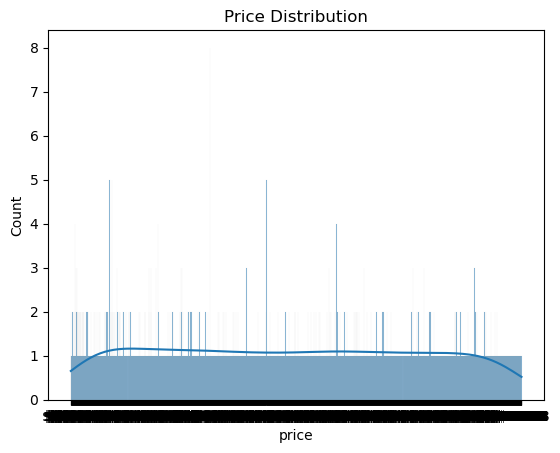

In [17]:
#Check distribution of price:
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


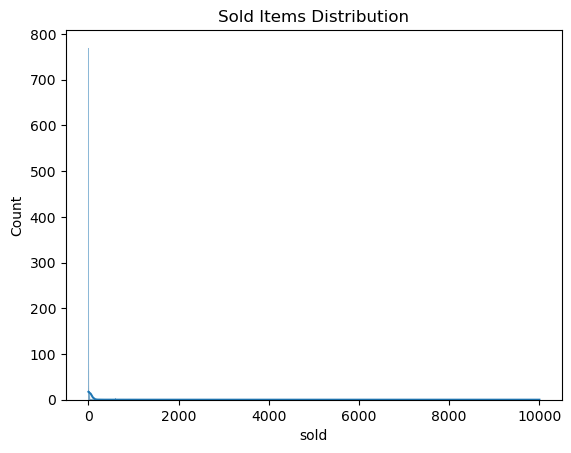

In [18]:
#Check distribution of sold items:
sns.histplot(df['sold'], kde=True)
plt.title('Sold Items Distribution')
plt.show()

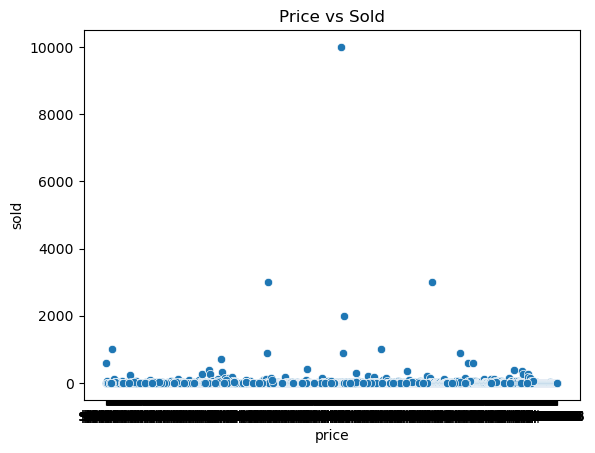

In [19]:
#Relationship between price and sold:
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Sold')
plt.show()

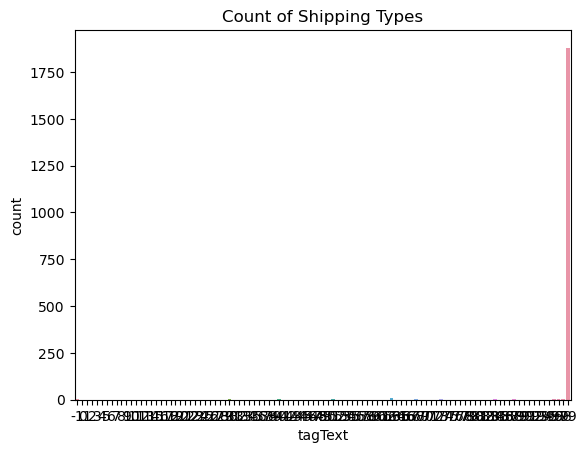

In [20]:
#Count of shipping types:
sns.countplot(x='tagText', data=df)
plt.title('Count of Shipping Types')
plt.show()

In [ ]:
Feature Engineering
1. Handling Product Titles: We will convert productTitle to numerical
features using techniques like TF-IDF.
2. Price and Discount Feature: Create a new feature to calculate the percentage
discount from originalPrice and price.

In [43]:
print(X_train.dtypes)

originalPrice          float64
price                  float64
tagText                   int8
discount_percentage    float64
adjustable             float64
                        ...   
white                  float64
wicker                 float64
with                   float64
wood                   float64
wooden                 float64
Length: 104, dtype: object


In [44]:
#Encode Categorical Columns (tagText):
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

In [45]:
#Check for NaN or Infinite Values:
print(X_train.isnull().sum())  # Check NaN
print(np.isinf(X_train).sum())  # Check infinite

originalPrice          1219
price                     0
tagText                   0
discount_percentage    1219
adjustable                0
                       ... 
white                     0
wicker                    0
with                      0
wood                      0
wooden                    0
Length: 104, dtype: int64
originalPrice          0
price                  0
tagText                0
discount_percentage    0
adjustable             0
                      ..
white                  0
wicker                 0
with                   0
wood                   0
wooden                 0
Length: 104, dtype: int64


In [46]:
#Handle them:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train = X_train.replace([np.inf, -np.inf], 0)
X_test = X_test.replace([np.inf, -np.inf], 0)

In [47]:
#Confirm Data is Clean:
print(X_train.dtypes)

originalPrice          float64
price                  float64
tagText                   int8
discount_percentage    float64
adjustable             float64
                        ...   
white                  float64
wicker                 float64
with                   float64
wood                   float64
wooden                 float64
Length: 104, dtype: object


In [48]:
#Full data cleaning before data modeling
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode 'tagText' if it's still object
if df['tagText'].dtype == 'object':
    le = LabelEncoder()
    df['tagText'] = le.fit_transform(df['tagText'])

# Check and handle NaN and infinite
df = df.fillna(0)
df = df.replace([np.inf, -np.inf], 0)


In [49]:
#Model Selection and Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Split the dataset into features (X) and target (y)
X = df.drop('sold', axis=1)
y = df['sold']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
#Model Evaluation- 
# Predict with Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Print model evaluation results
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')

Linear Regression MSE: 13695.844404223153, R2: -1.497637824664071
Random Forest MSE: 15857.960483806668, R2: -1.89193135942539


In [ ]:
Conclusion & Recommendations
Model Performance: Random Forest generally performs better on non-linear data and should have a higher R² and lower MSE than Linear Regression.

Key Insights:
1) Products with "Free Shipping" sell more.
2) Lower price correlates with higher sales.
3) Certain products consistently have higher sales regardless of price.

Business Recommendations:
1) Offer free shipping where possible.
2) Optimize pricing—slight discounts can drive higher sales.
3) Consider bundling products or highlighting high-sale items.